In [2]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from src.plotting import *
from src.utils import *

# Precipitation, Column Vapor, and Precipitation Efficiency

In [3]:
gsam_pcs = load_gsam_pcs_on_era5_levels()
gsam_2d = load_gsam_coarse_50pix('2D')
gsam_pr = gsam_2d.Preca
gsam_pw  = gsam_2d.PW
gsam_iwp = (gsam_2d.IWP)
gsam_lwp = (gsam_2d.CWP)

In [4]:
# Observational + ERA data
era5_pcs = load_era5_pcs()
era5_tcwv = load_era5_tcwv_2deg()
cmorph_pr = load_cmorph_precip_2deg() * 24 # to mm/d
ceres_data = load_ceres_syn1deg_data() / 1000 # to kg/m2
ceres_data = ceres_data.coarsen({'lat': 2, 'lon':2}).mean()
ceres_data['time'] = ceres_data.time.dt.floor('h')
ceres_lwp = ceres_data.lwp_total_1h
ceres_iwp = ceres_data.iwp_total_1h

In [5]:
common_obs_time = set(gsam_pcs.time.data) & set(era5_pcs.time.data) & set(cmorph_pr.time.data) & set(ceres_lwp.time.data)

era5_pcs = era5_pcs.sel(time=list(common_obs_time))
era5_tcwv = era5_tcwv.sel(time=list(common_obs_time))
cmorph_pr = cmorph_pr.sel(time=list(common_obs_time))
ceres_lwp = ceres_lwp.sel(time=list(common_obs_time))
ceres_iwp = ceres_iwp.sel(time=list(common_obs_time))
gsam_pcs = gsam_pcs.sel(time=list(common_obs_time))
gsam_pr = gsam_pr.sel(time=list(common_obs_time))
gsam_pw = gsam_pw.sel(time=list(common_obs_time))
gsam_iwp = gsam_iwp.sel(time=list(common_obs_time))
gsam_lwp = gsam_lwp.sel(time=list(common_obs_time))

In [6]:
pc1_bins = np.arange(-10, 10, 0.5)
pc2_bins = np.arange(-10, 10, 0.5)
midpoint_pc1_bins = array_midpoints(pc1_bins)
midpoint_pc2_bins = array_midpoints(pc2_bins)
xmesh, ymesh = np.meshgrid(midpoint_pc1_bins, midpoint_pc2_bins)
normed = True
obs_cutoff = 5
stat = lambda x: np.nanmean(x) if x.size>=obs_cutoff else np.nan

## IWP and CWP

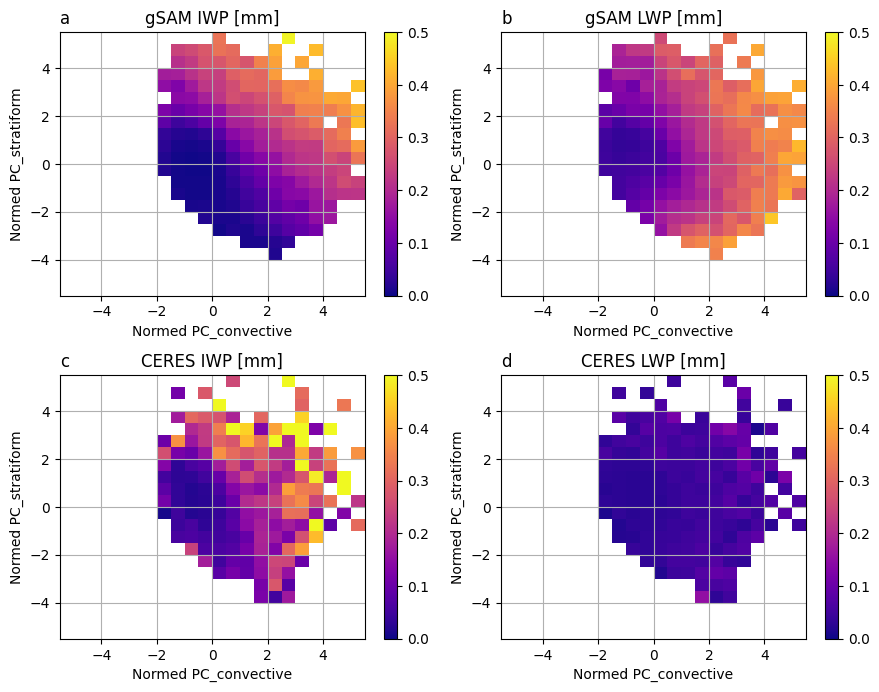

In [7]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(9, 7))

# First subplot: gSAM IWP
ax = axs[0,0]
ax.set_title('a', loc='left')
ax.set_title('gSAM IWP [mm]', loc='center')
d = bin_stat_by_pcs(gsam_pcs, gsam_iwp, pc1_bins, pc2_bins, stat)
c = ax.pcolormesh(xmesh, ymesh, d, norm=colors.Normalize(vmin=0, vmax=0.5), cmap=plt.cm.plasma.copy())
ax.set_xlabel(rf'Normed PC_convective')
ax.set_ylabel(rf'Normed PC_stratiform')
ax.grid()
ax.set_xlim(-5.5, 5.5)
ax.set_ylim(-5.5, 5.5)
fig.colorbar(c)

# Second subplot: gSAM LWP
ax = axs[0,1]
ax.set_title('b', loc='left')
ax.set_title('gSAM LWP [mm]', loc='center')
d = bin_stat_by_pcs(gsam_pcs, gsam_lwp, pc1_bins, pc2_bins, stat)
c = ax.pcolormesh(xmesh, ymesh, d, norm=colors.Normalize(vmin=0, vmax=0.5), cmap=plt.cm.plasma.copy())
ax.set_xlabel(rf'Normed PC_convective')
ax.set_ylabel(rf'Normed PC_stratiform')
ax.grid()
ax.set_xlim(-5.5, 5.5)
ax.set_ylim(-5.5, 5.5)
fig.colorbar(c)

# Third subplot: CERES IWP
ax = axs[1,0]
ax.set_title('c', loc='left')
ax.set_title('CERES IWP [mm]', loc='center')
d = bin_stat_by_pcs(era5_pcs, ceres_iwp, pc1_bins, pc2_bins, stat)
c = ax.pcolormesh(xmesh, ymesh, d, norm=colors.Normalize(vmin=0, vmax=0.5), cmap=plt.cm.plasma.copy())
ax.set_xlabel(rf'Normed PC_convective')
ax.set_ylabel(rf'Normed PC_stratiform')
ax.grid()
ax.set_xlim(-5.5, 5.5)
ax.set_ylim(-5.5, 5.5)
fig.colorbar(c)

# Fourth subplot: CERES LWP
ax = axs[1,1]
ax.set_title('d', loc='left')
ax.set_title('CERES LWP [mm]', loc='center')
d = bin_stat_by_pcs(era5_pcs, ceres_lwp, pc1_bins, pc2_bins, stat)
c = ax.pcolormesh(xmesh, ymesh, d, norm=colors.Normalize(vmin=0, vmax=0.5), cmap=plt.cm.plasma.copy())
ax.set_xlabel(rf'Normed PC_convective')
ax.set_ylabel(rf'Normed PC_stratiform')
ax.grid()
ax.set_xlim(-5.5, 5.5)
ax.set_ylim(-5.5, 5.5)
fig.colorbar(c)

plt.tight_layout(pad=1)

# save_figure(fig, 'mean_iwp_lwp.pdf')


## Precip Efficiency

In [8]:
# Compute Precip Efficiency
gsam_pe = gsam_pr/gsam_pw
obs_pe  = cmorph_pr/era5_tcwv

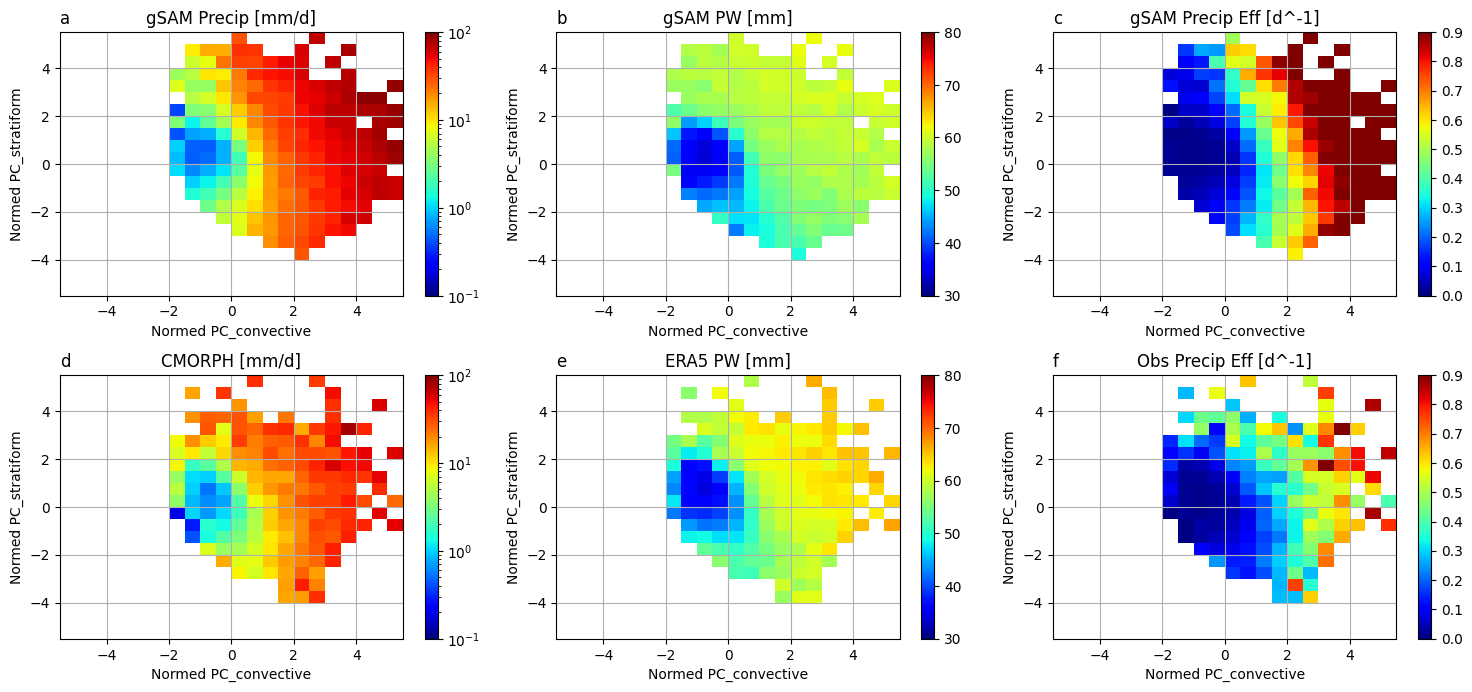

In [10]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15, 7))

# Precip rates
ax = axs[0,0]
ax.set_title('a', loc='left')
ax.set_title('gSAM Precip [mm/d]', loc='center')
d = bin_stat_by_pcs(gsam_pcs, gsam_pr, pc1_bins, pc2_bins, stat)
c = ax.pcolormesh(xmesh, ymesh, d, norm=colors.LogNorm(vmin=1e-1, vmax=1e2), cmap=plt.cm.jet.copy())
ax.set_xlabel(rf'Normed PC_convective')
ax.set_ylabel(rf'Normed PC_stratiform')
ax.grid()
ax.set_xlim(-5.5, 5.5)
ax.set_ylim(-5.5, 5.5)
fig.colorbar(c)

ax = axs[1,0]
ax.set_title('d', loc='left')
ax.set_title('CMORPH [mm/d]', loc='center')
d = bin_stat_by_pcs(era5_pcs, cmorph_pr, pc1_bins, pc2_bins, stat)
c = ax.pcolormesh(xmesh, ymesh, d, norm=colors.LogNorm(vmin=1e-1, vmax=1e2), cmap=plt.cm.jet.copy())
ax.set_xlabel(rf'Normed PC_convective')
ax.set_ylabel(rf'Normed PC_stratiform')
ax.grid()
ax.set_xlim(-5.5, 5.5)
ax.set_ylim(-5.5, 5.5)
fig.colorbar(c)

ax = axs[0,1]
ax.set_title('b', loc='left')
ax.set_title('gSAM PW [mm]', loc='center')
d = bin_stat_by_pcs(gsam_pcs, gsam_pw, pc1_bins, pc2_bins, stat)
c = ax.pcolormesh(xmesh, ymesh, d, norm=colors.Normalize(vmin=30, vmax=80), cmap=plt.cm.jet.copy())
ax.set_xlabel(rf'Normed PC_convective')
ax.set_ylabel(rf'Normed PC_stratiform')
ax.grid()
ax.set_xlim(-5.5, 5.5)
ax.set_ylim(-5.5, 5.5)
fig.colorbar(c)

ax = axs[1,1]
ax.set_title('e', loc='left')
ax.set_title('ERA5 PW [mm]', loc='center')
d = bin_stat_by_pcs(era5_pcs, era5_tcwv, pc1_bins, pc2_bins, stat)
c = ax.pcolormesh(xmesh, ymesh, d, norm=colors.Normalize(vmin=30, vmax=80), cmap=plt.cm.jet.copy())
ax.set_xlabel(rf'Normed PC_convective')
ax.set_ylabel(rf'Normed PC_stratiform')
ax.grid()
ax.set_xlim(-5.5, 5.5)
ax.set_ylim(-5.5, 5.5)
fig.colorbar(c)

ax = axs[0,2]
ax.set_title('c', loc='left')
ax.set_title('gSAM Precip Eff [d^-1]', loc='center')
d = bin_stat_by_pcs(gsam_pcs, gsam_pe, pc1_bins, pc2_bins, stat)
c = ax.pcolormesh(xmesh, ymesh, d, norm=colors.Normalize(vmin=0, vmax=0.9), cmap=plt.cm.jet.copy())
ax.set_xlabel(rf'Normed PC_convective')
ax.set_ylabel(rf'Normed PC_stratiform')
ax.grid()
ax.set_xlim(-5.5, 5.5)
ax.set_ylim(-5.5, 5.5)
fig.colorbar(c)

ax = axs[1,2]
ax.set_title('f', loc='left')
ax.set_title('Obs Precip Eff [d^-1]', loc='center')
d = bin_stat_by_pcs(era5_pcs, obs_pe, pc1_bins, pc2_bins, stat)
c = ax.pcolormesh(xmesh, ymesh, d, norm=colors.Normalize(vmin=0, vmax=0.9), cmap=plt.cm.jet.copy())
ax.set_xlabel(rf'Normed PC_convective')
ax.set_ylabel(rf'Normed PC_stratiform')
ax.grid()
ax.set_xlim(-5.5, 5.5)
ax.set_ylim(-5.5, 5.5)
fig.colorbar(c)

plt.tight_layout(pad=1)
# save_figure(fig, 'mean_precip_pw_pe.pdf')


# Cloud Radiative effects

In [13]:
gsam_pcs = load_gsam_pcs_on_era5_levels().isel(time=slice(None, -1))
gsam_2d = load_gsam_coarse_50pix('2D')

In [14]:
era5_pcs = load_era5_pcs()
ceres_data = load_ceres_syn1deg_data()
ceres_data = ceres_data.coarsen({'lat': 2, 'lon':2}).mean()
ceres_data['time'] = ceres_data.time.dt.floor('h')
ceres_data = ceres_data.sel(time=era5_pcs.time)

In [15]:
common_obs_time = set(ceres_data.time.data) & set(gsam_pcs.time.data)
gsam_pcs = gsam_pcs.sel(time=list(common_obs_time))
gsam_2d  = gsam_2d.sel(time=list(common_obs_time))
ceres_data = ceres_data.sel(time=list(common_obs_time))
era5_pcs = era5_pcs.sel(time=list(common_obs_time))

In [16]:
# Compute the cloud radiative effects:
gsam_lw_cre = gsam_2d.LWNTC - gsam_2d.LWNT
gsam_sw_cre = (-gsam_2d.SWNTC) - (-gsam_2d.SWNT)
gsam_net_cre = gsam_lw_cre + gsam_sw_cre

In [17]:
ceres_lw_cre = (ceres_data.toa_lw_clr_1h - ceres_data.toa_lw_all_1h)
ceres_sw_cre = (ceres_data.toa_sw_clr_1h - ceres_data.toa_sw_all_1h)
ceres_net_cre = ceres_lw_cre + ceres_sw_cre

In [18]:
pc1_bins = np.arange(-10, 10, 0.5)
pc2_bins = np.arange(-10, 10, 0.5)
midpoint_pc1_bins = array_midpoints(pc1_bins)
midpoint_pc2_bins = array_midpoints(pc2_bins)
xmesh, ymesh = np.meshgrid(midpoint_pc1_bins, midpoint_pc2_bins)
obs_cutoff = 5
stat = lambda x: np.nanmean(x) if x.size>=obs_cutoff else np.nan

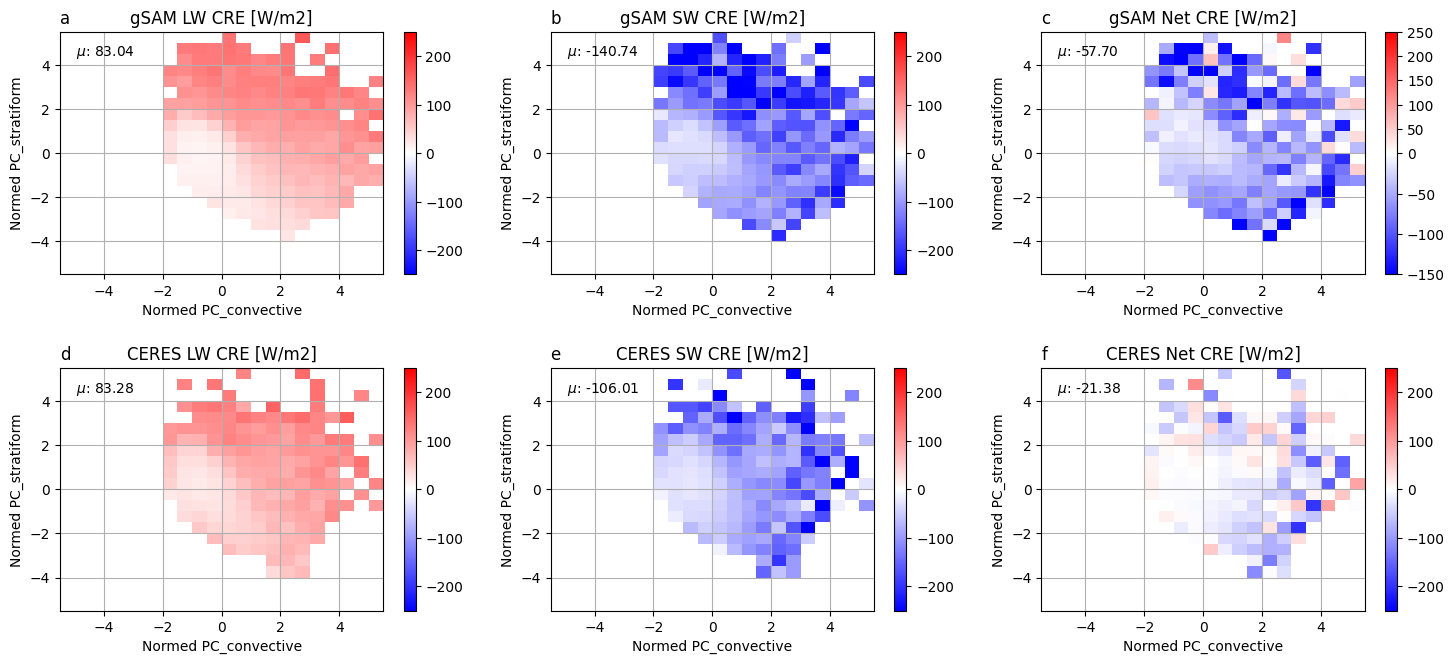

In [19]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15, 7))

# First subplot: gSAM LW CRE
ax = axs[0,0]
ax.set_title('a', loc='left')
ax.set_title('gSAM LW CRE [W/m2]', loc='center')
cre = bin_stat_by_pcs(gsam_pcs/gsam_pcs.std(('lat', 'lon', 'time')), gsam_lw_cre, pc1_bins, pc2_bins, stat)
c = ax.pcolormesh(xmesh, ymesh, cre, norm=colors.TwoSlopeNorm(vmin=-250, vcenter=0, vmax=250), cmap=plt.cm.bwr.copy())
ax.text(0.05, 0.95, fr'$\mu$: {np.nanmean(cre).item():.2f}', transform=ax.transAxes, fontsize=10, verticalalignment='top', alpha=1)
ax.set_xlabel(rf'Normed PC_convective')
ax.set_ylabel(rf'Normed PC_stratiform')
ax.grid()
ax.set_xlim(-5.5, 5.5)
ax.set_ylim(-5.5, 5.5)
fig.colorbar(c)

# Second subplot: gSAM SW CRE
ax = axs[0,1]
ax.set_title('b', loc='left')
ax.set_title('gSAM SW CRE [W/m2]', loc='center')
cre = bin_stat_by_pcs(gsam_pcs/gsam_pcs.std(('lat', 'lon', 'time')), gsam_sw_cre, pc1_bins, pc2_bins, stat)
c = ax.pcolormesh(xmesh, ymesh, cre, norm=colors.TwoSlopeNorm(vmin=-250, vcenter=0, vmax=250), cmap=plt.cm.bwr.copy())
ax.text(0.05, 0.95, fr'$\mu$: {np.nanmean(cre).item():.2f}', transform=ax.transAxes, fontsize=10, verticalalignment='top', alpha=1)
ax.set_xlabel(rf'Normed PC_convective')
ax.set_ylabel(rf'Normed PC_stratiform')
ax.grid()
ax.set_xlim(-5.5, 5.5)
ax.set_ylim(-5.5, 5.5)
fig.colorbar(c)

# Third subplot: gSAM Net CRE
ax = axs[0,2]
ax.set_title('c', loc='left')
ax.set_title('gSAM Net CRE [W/m2]', loc='center')
cre = bin_stat_by_pcs(gsam_pcs/gsam_pcs.std(('lat', 'lon', 'time')), gsam_net_cre, pc1_bins, pc2_bins, stat)
c = ax.pcolormesh(xmesh, ymesh, cre, norm=colors.TwoSlopeNorm(vmin=-150, vcenter=0, vmax=250), cmap=plt.cm.bwr.copy())
ax.text(0.05, 0.95, fr'$\mu$: {np.nanmean(cre).item():.2f}', transform=ax.transAxes, fontsize=10, verticalalignment='top', alpha=1)
ax.set_xlabel(rf'Normed PC_convective')
ax.set_ylabel(rf'Normed PC_stratiform')
ax.grid()
ax.set_xlim(-5.5, 5.5)
ax.set_ylim(-5.5, 5.5)
fig.colorbar(c)

# Fourth subplot: CERES LW CRE
ax = axs[1,0]
ax.set_title('d', loc='left')
ax.set_title('CERES LW CRE [W/m2]', loc='center')
cre = bin_stat_by_pcs(era5_pcs/era5_pcs.std(('lat', 'lon', 'time')), ceres_lw_cre, pc1_bins, pc2_bins, stat)
c = ax.pcolormesh(xmesh, ymesh, cre, norm=colors.TwoSlopeNorm(vmin=-250, vcenter=0, vmax=250), cmap=plt.cm.bwr.copy())
ax.text(0.05, 0.95, fr'$\mu$: {np.nanmean(cre).item():.2f}', transform=ax.transAxes, fontsize=10, verticalalignment='top', alpha=1)
ax.set_xlabel(rf'Normed PC_convective')
ax.set_ylabel(rf'Normed PC_stratiform')
ax.grid()
ax.set_xlim(-5.5, 5.5)
ax.set_ylim(-5.5, 5.5)
fig.colorbar(c)

# Fifth subplot: CERES SW CRE
ax = axs[1,1]
ax.set_title('e', loc='left')
ax.set_title('CERES SW CRE [W/m2]', loc='center')
cre = bin_stat_by_pcs(era5_pcs/era5_pcs.std(('lat', 'lon', 'time')), ceres_sw_cre, pc1_bins, pc2_bins, stat)
c = ax.pcolormesh(xmesh, ymesh, cre, norm=colors.TwoSlopeNorm(vmin=-250, vcenter=0, vmax=250), cmap=plt.cm.bwr.copy())
ax.text(0.05, 0.95, fr'$\mu$: {np.nanmean(cre).item():.2f}', transform=ax.transAxes, fontsize=10, verticalalignment='top', alpha=1)
ax.set_xlabel(rf'Normed PC_convective')
ax.set_ylabel(rf'Normed PC_stratiform')
ax.grid()
ax.set_xlim(-5.5, 5.5)
ax.set_ylim(-5.5, 5.5)
fig.colorbar(c)

# Sixth subplot: CERES Net CRE
ax = axs[1,2]
ax.set_title('f', loc='left')
ax.set_title('CERES Net CRE [W/m2]', loc='center')
cre = bin_stat_by_pcs(era5_pcs/era5_pcs.std(('lat', 'lon', 'time')), ceres_net_cre, pc1_bins, pc2_bins, stat)
c = ax.pcolormesh(xmesh, ymesh, cre, norm=colors.TwoSlopeNorm(vmin=-250, vcenter=0, vmax=250), cmap=plt.cm.bwr.copy())
ax.text(0.05, 0.95, fr'$\mu$: {np.nanmean(cre).item():.2f}', transform=ax.transAxes, fontsize=10, verticalalignment='top', alpha=1)
ax.set_xlabel(rf'Normed PC_convective')
ax.set_ylabel(rf'Normed PC_stratiform')
ax.grid()
ax.set_xlim(-5.5, 5.5)
ax.set_ylim(-5.5, 5.5)
fig.colorbar(c)

fig.tight_layout(pad=2)
save_figure(fig, 'mean_cre.pdf')

# GMS

In [28]:
gsam_w = load_gsam_coarse_50pix('W').W
gsam_q = load_gsam_coarse_50pix('QV').QV *1e-3 # convert to kg/kg
gsam_pcs = load_gsam_pcs_on_era5_levels()
gsam_2d = load_gsam_coarse_50pix('2D')
gsam_rho = load_gsam_ref_data().rho
gsam_vadv = ((gsam_w*gsam_rho)*gsam_q).integrate('z')

In [29]:
pc1_bins = np.arange(-10, 10, 0.5)
pc2_bins = np.arange(-10, 10, 0.5)
midpoint_pc1_bins = array_midpoints(pc1_bins)
midpoint_pc2_bins = array_midpoints(pc2_bins)
xmesh, ymesh = np.meshgrid(midpoint_pc1_bins, midpoint_pc2_bins)
obs_cutoff = 5
stat = lambda x: np.nanmean(x) if x.size>=obs_cutoff else np.nan

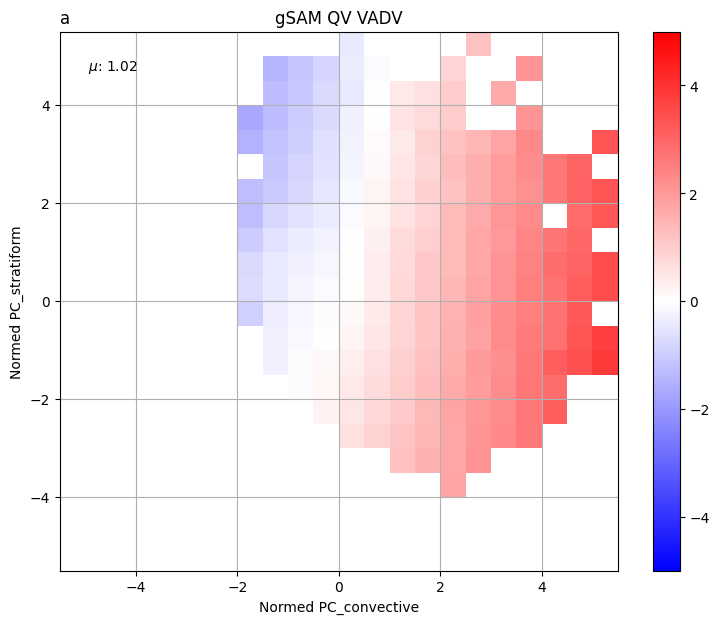

In [32]:
fig, ax = plt.subplots(figsize=(9, 7))

# First subplot: gSAM LW CRE
ax.set_title('a', loc='left')
ax.set_title('gSAM QV VADV', loc='center')
vadv = bin_stat_by_pcs(gsam_pcs, gsam_vadv, pc1_bins, pc2_bins, stat)
c = ax.pcolormesh(xmesh, ymesh, vadv, norm=colors.TwoSlopeNorm(vmin=-5, vcenter=0, vmax=5), cmap=plt.cm.bwr.copy())
ax.text(0.05, 0.95, fr'$\mu$: {np.nanmean(vadv).item():.2f}', transform=ax.transAxes, fontsize=10, verticalalignment='top', alpha=1)
ax.set_xlabel(rf'Normed PC_convective')
ax.set_ylabel(rf'Normed PC_stratiform')
ax.grid()
ax.set_xlim(-5.5, 5.5)
ax.set_ylim(-5.5, 5.5)
fig.colorbar(c)
